Stats
         PowerLimit          Size          Cost       Package          Core   
count  31500.000000  31500.000000  31500.000000  31500.000000  31500.000000  \
mean     217.000000   2833.333333    624.571429      1.244394      1.109950   
std      391.817398   1649.942013    232.566857      3.346708      3.081797   
min        5.000000   1000.000000    237.000000      0.018982      0.012451   
25%       10.000000   1000.000000    444.000000      0.067307      0.043152   
50%       20.000000   2500.000000    596.500000      0.312195      0.254730   
75%       50.000000   5000.000000    775.000000      0.748916      0.657852   
max     1000.000000   5000.000000   1285.000000     25.059814     23.374634   

                GPU     DRAM          Time   Temperature         Memory  
count  31500.000000  31500.0  31500.000000  31500.000000   31500.000000  
mean       0.000660      0.0    127.534540     44.459857   19269.177778  
std        0.004683      0.0    285.203247      2.004816   3

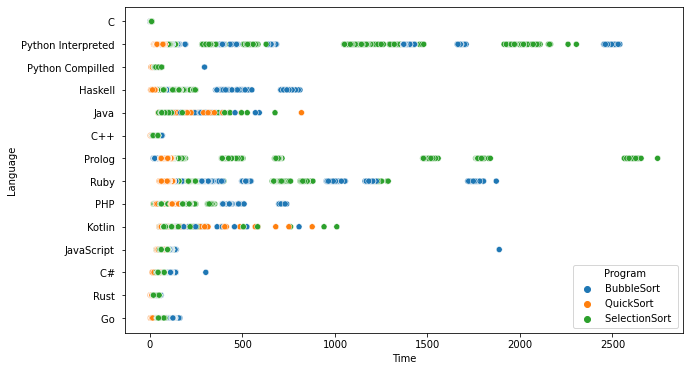

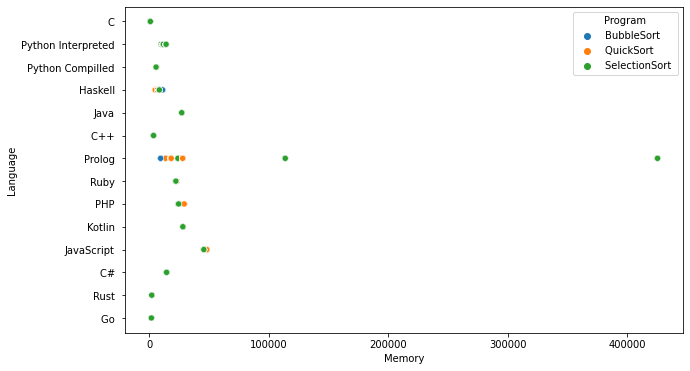

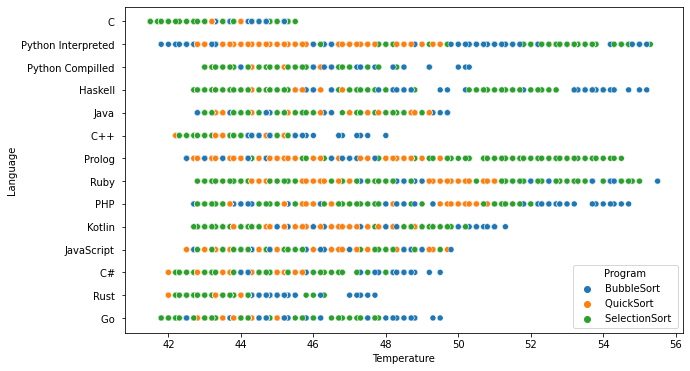

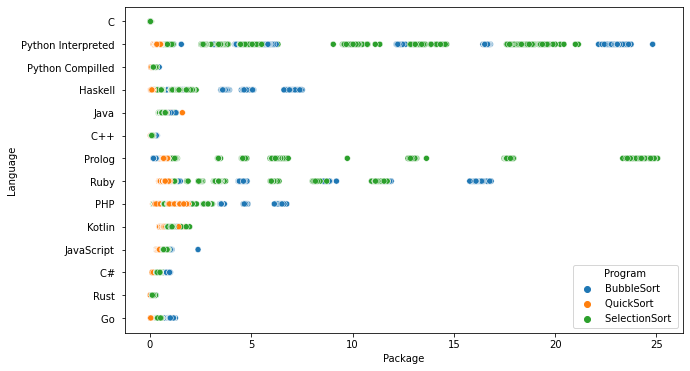

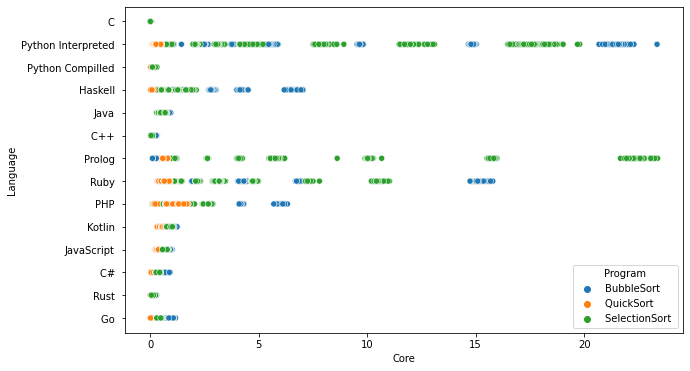

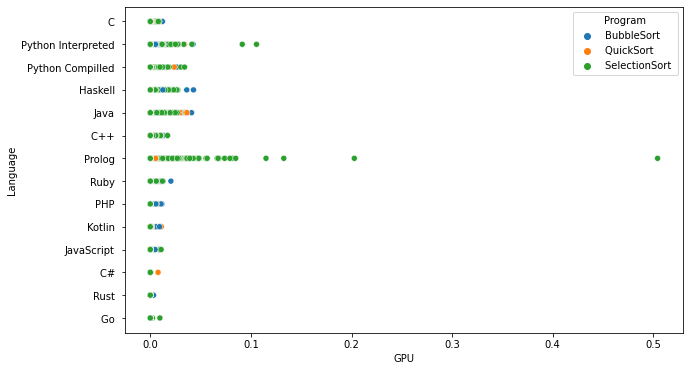

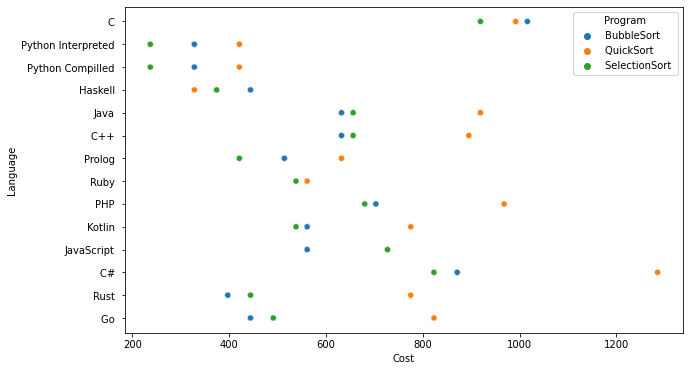

In [94]:
# estatísticas básicas
import seaborn as sea
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


file_name = '../measurements.csv'
df = pd.read_csv(file_name, header = 0, delimiter=",", decimal=".")
for col in ["Time", "Memory", "Temperature", "Package", "Core", "GPU","Cost"]:
    plt.figure(figsize=(10,6))
    sea.scatterplot(data=df,hue='Program',y='Language', x=col)

# estatísticas básicas (descritivas)
# summary stats
print("Stats")
print(df.describe())

In [95]:
df = df.drop(['GPU', 'Core','DRAM'], axis=1)

In [96]:
#Outliers treatment
#NOTE: This will remove 14*3*2 entries (14 languages, 3 sorting algorithms and 2 cases - best and worst executions)

# Agrupar o DataFrame por colunas "Language" e "Program"
grouped = df.groupby(['Language', 'Program'])

# Inicializar um DataFrame vazio para armazenar o resultado
df_removed_entries = pd.DataFrame()

# Iterar sobre cada grupo
for group_name, group_df in grouped:
    # Identificar o índice da melhor (menor tempo) e pior (maior tempo) entrada no grupo
    best_entry_index = group_df['Time'].idxmin()
    worst_entry_index = group_df['Time'].idxmax()
    
    # Remover as linhas com base nos índices encontrados e adicionar ao DataFrame resultante
    group_df = group_df.drop([best_entry_index, worst_entry_index])
    
    # Concatenar o DataFrame do grupo com o DataFrame resultante
    df_removed_entries = pd.concat([df_removed_entries, group_df])

# Imprimir o DataFrame resultante
print(df_removed_entries)


      Language         Program  PowerLimit  Size  Cost   Package  Time   
0           C      BubbleSort            5  1000  1016  0.030090     9  \
2           C      BubbleSort            5  1000  1016  0.034790     9   
3           C      BubbleSort            5  1000  1016  0.039490    10   
4           C      BubbleSort            5  1000  1016  0.031921     9   
5           C      BubbleSort            5  1000  1016  0.038147     9   
...        ...             ...         ...   ...   ...       ...   ...   
31345    Rust   SelectionSort         1000  5000   444  0.167053    19   
31346    Rust   SelectionSort         1000  5000   444  0.172302    20   
31347    Rust   SelectionSort         1000  5000   444  0.111938    45   
31348    Rust   SelectionSort         1000  5000   444  0.180603    19   
31349    Rust   SelectionSort         1000  5000   444  0.117249    50   

       Temperature  Memory  
0             45.3     904  
2             45.0     900  
3             45.0     9

In [97]:
#Guardar medias para csv
grouped_table = df[(df['Size'] == 5000)&(df['PowerLimit'] == 1000) &(df['Program'] =='QuickSort ')]
grouped_table = grouped_table.drop('Size', axis=1)
grouped_table = grouped_table.drop('PowerLimit', axis=1)
grouped_table = grouped_table.drop('Program', axis=1)
grouped_table = grouped_table.groupby(['Language']).mean()
grouped_table.to_csv('filteredData.csv')

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


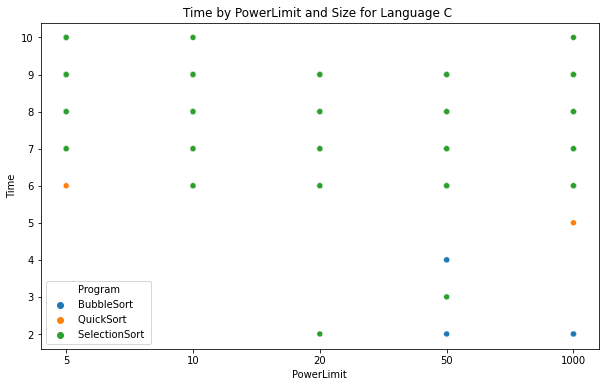

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


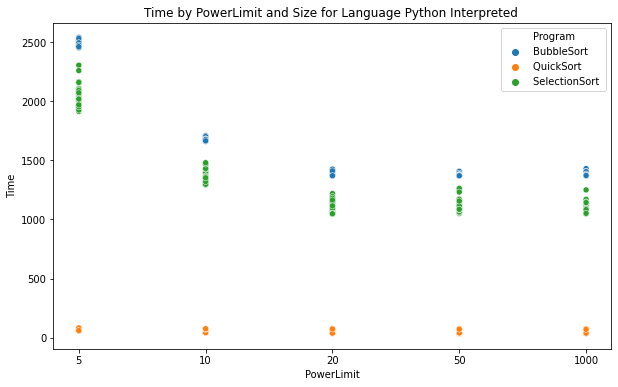

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


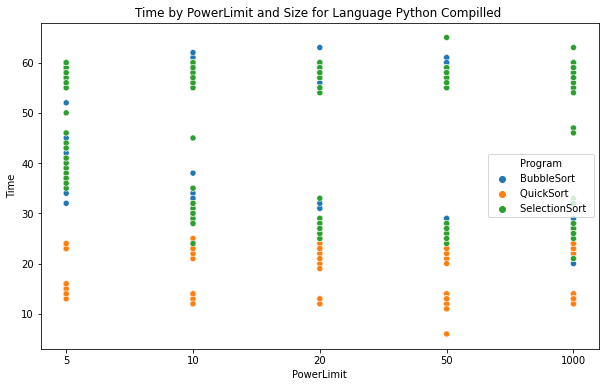

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


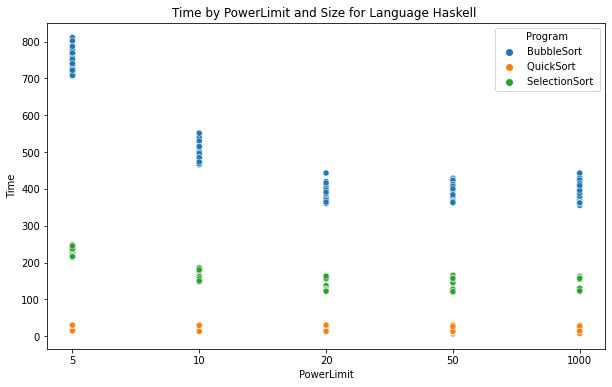

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


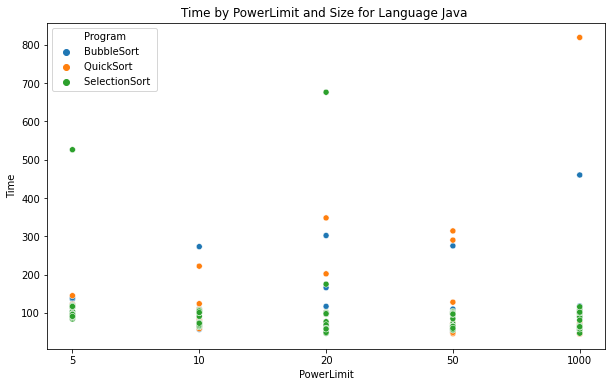

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


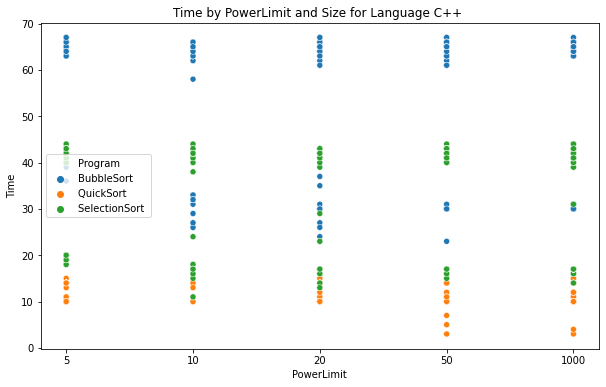

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


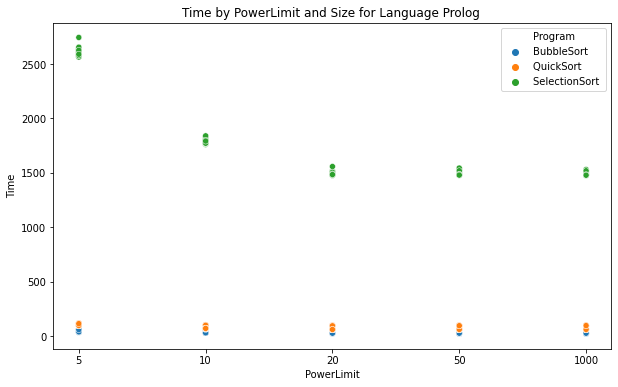

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


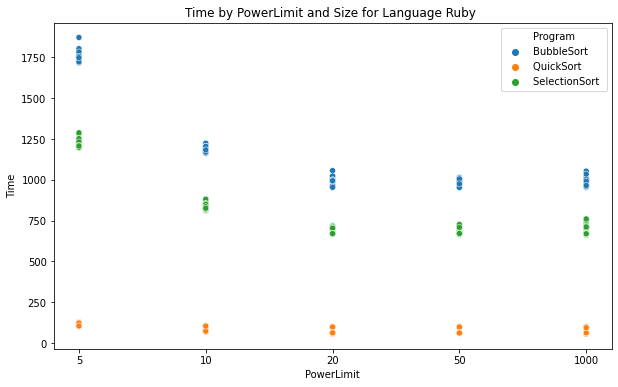

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


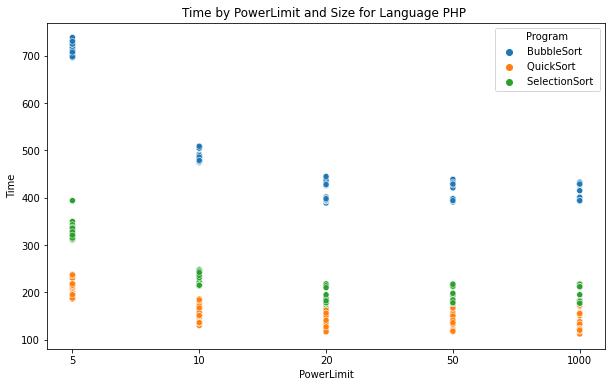

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


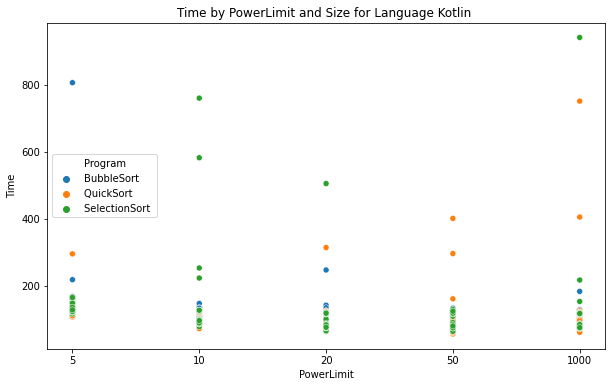

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


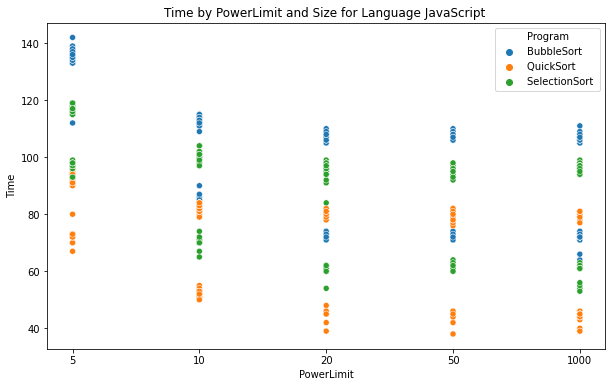

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


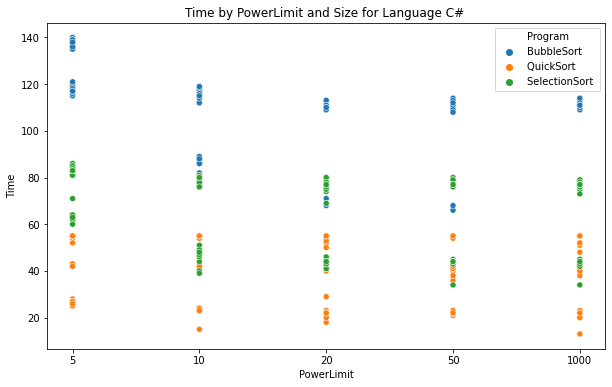

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


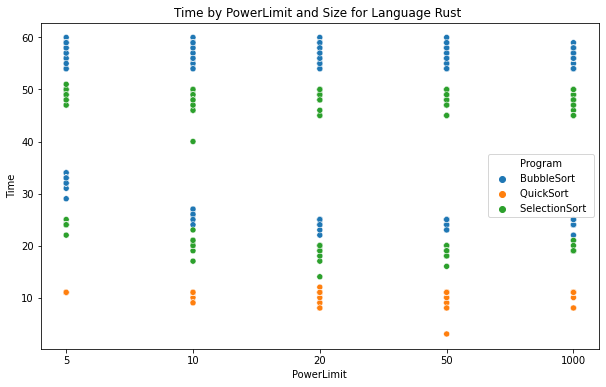

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


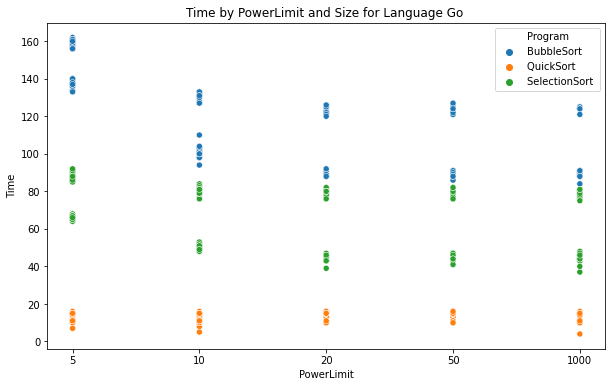

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


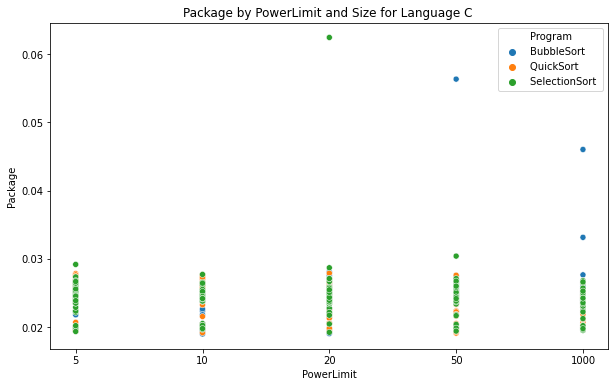

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


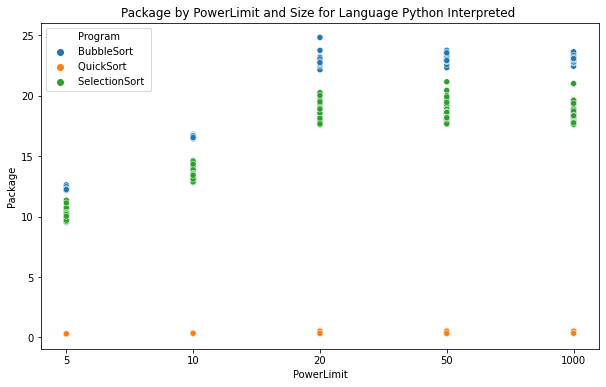

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


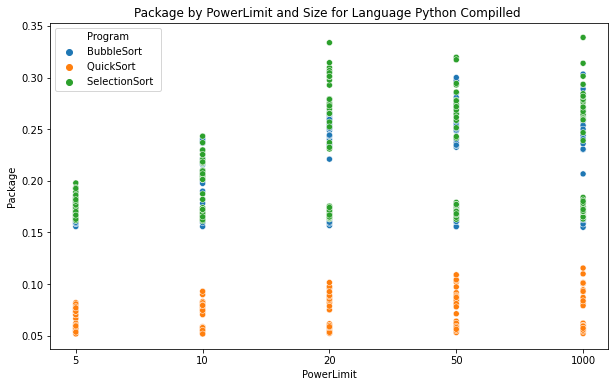

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


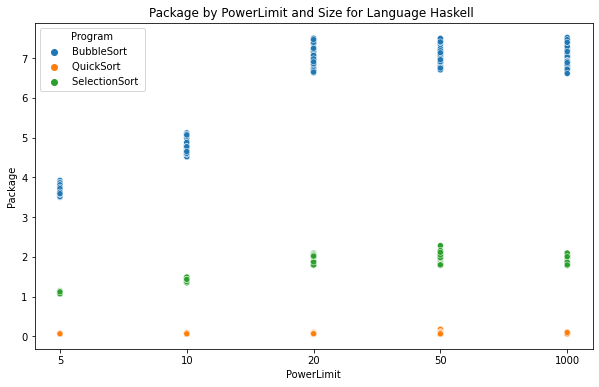

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


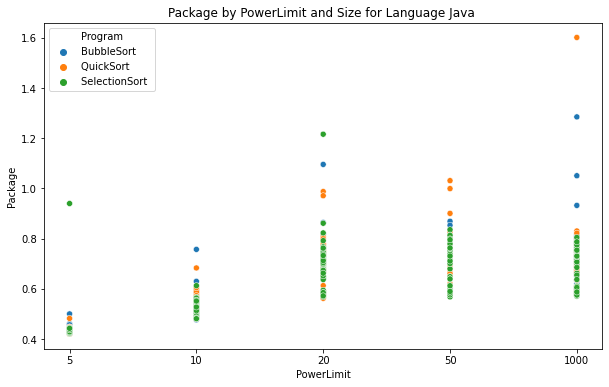

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


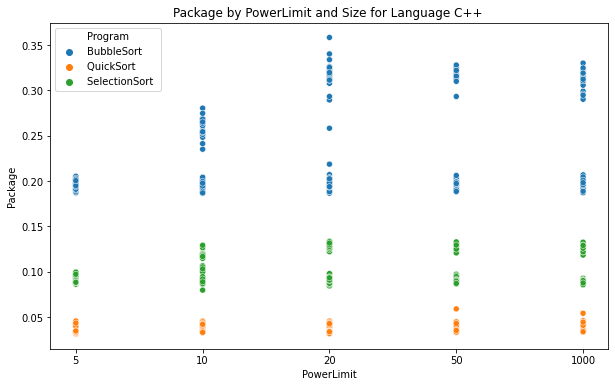

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


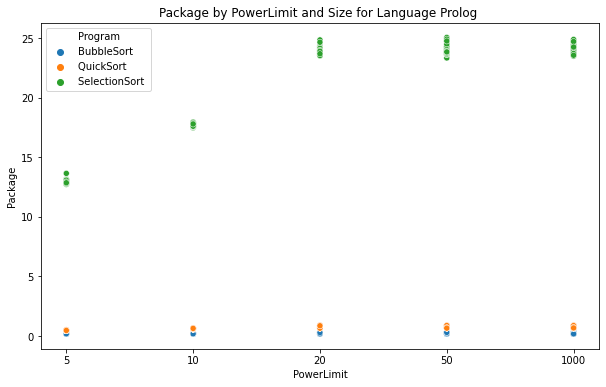

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


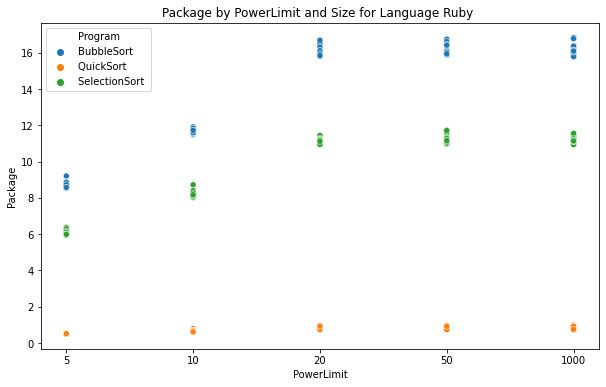

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


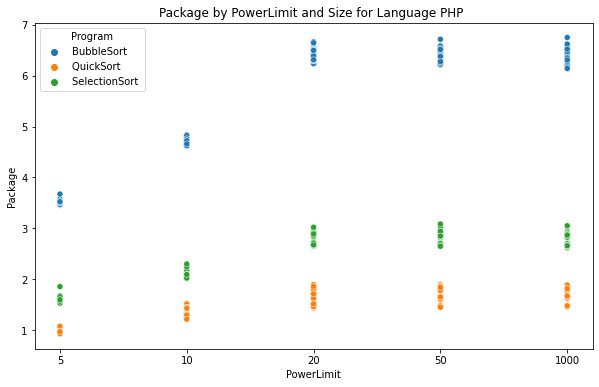

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


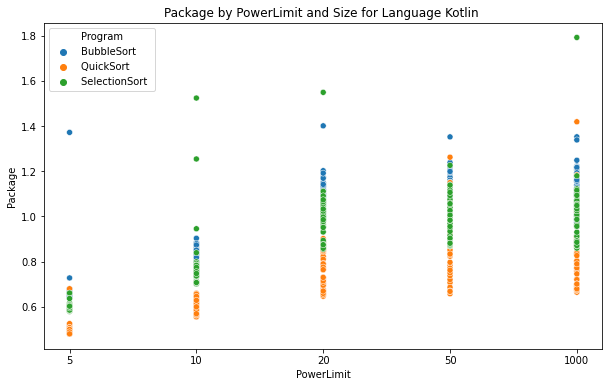

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


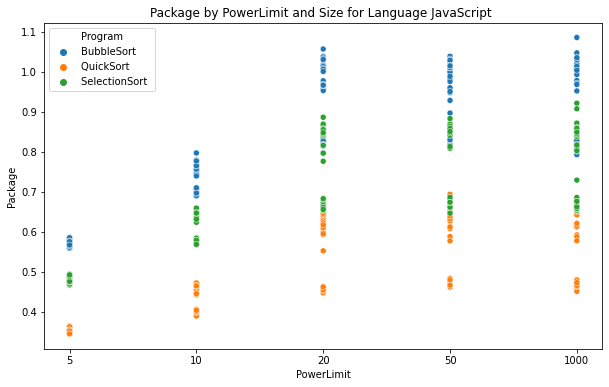

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


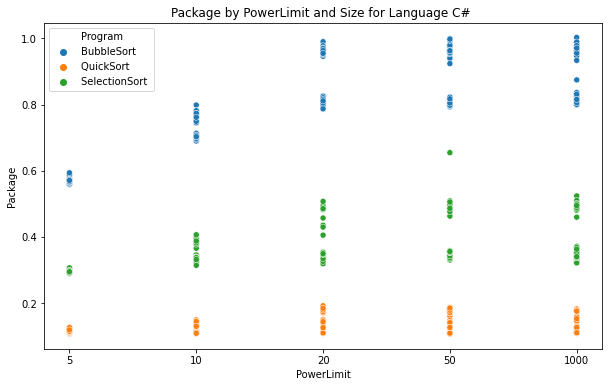

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


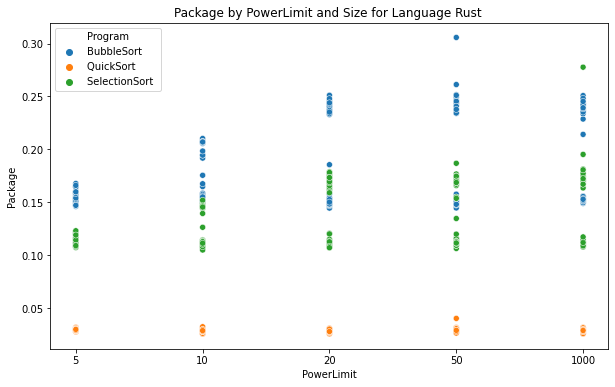

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


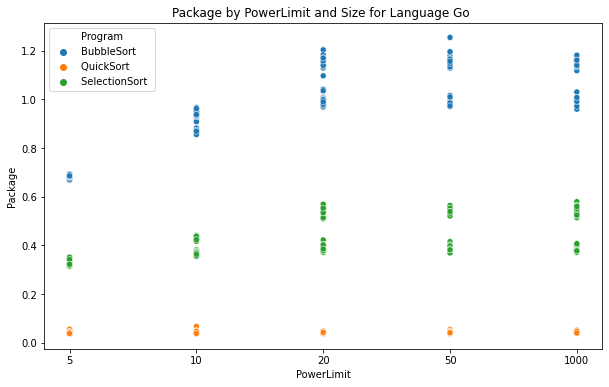

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


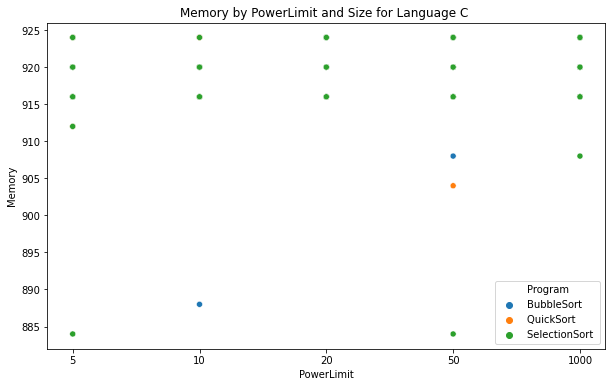

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


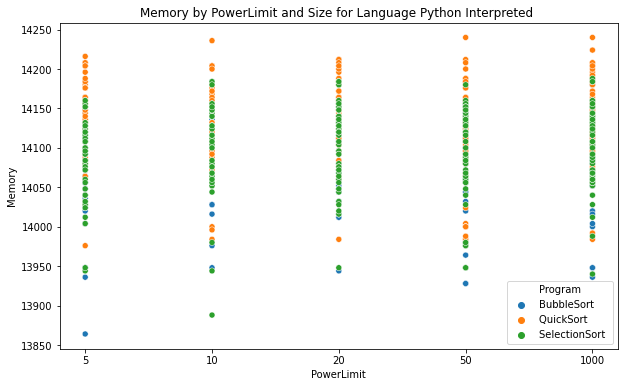

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


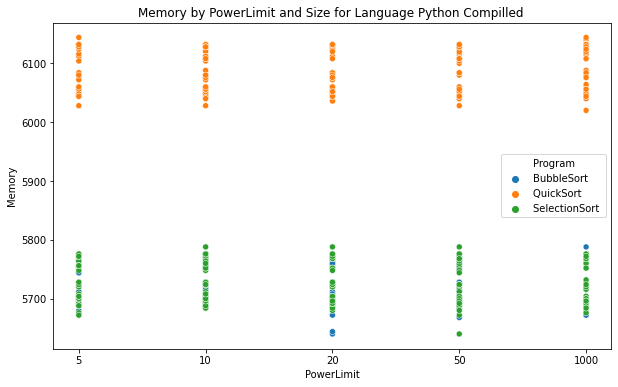

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


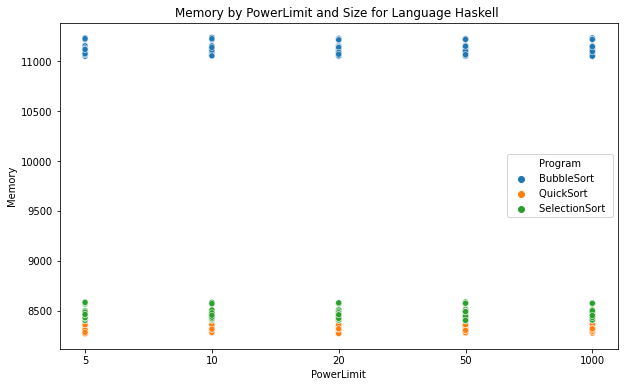

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


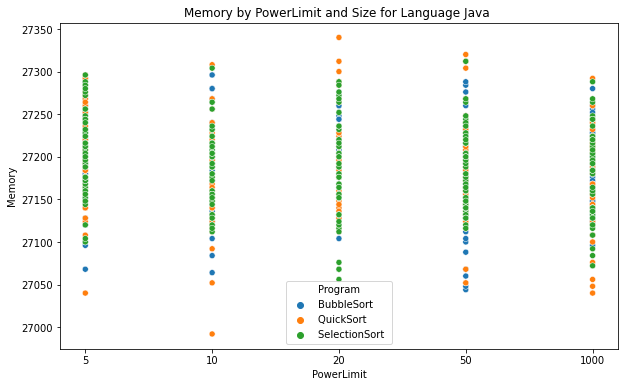

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


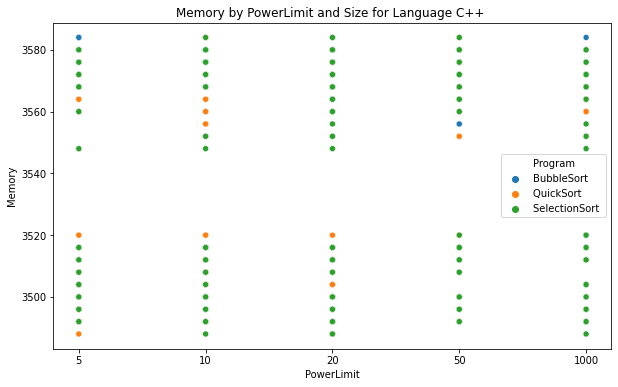

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


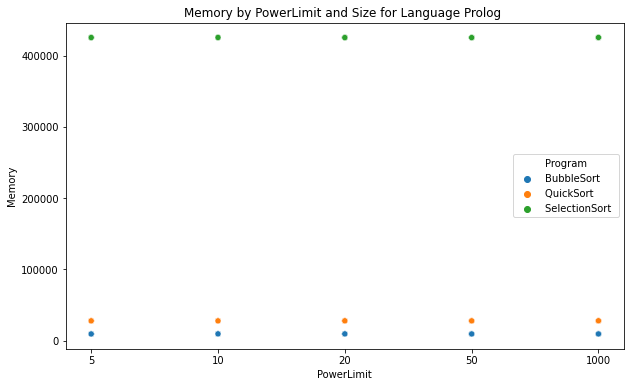

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


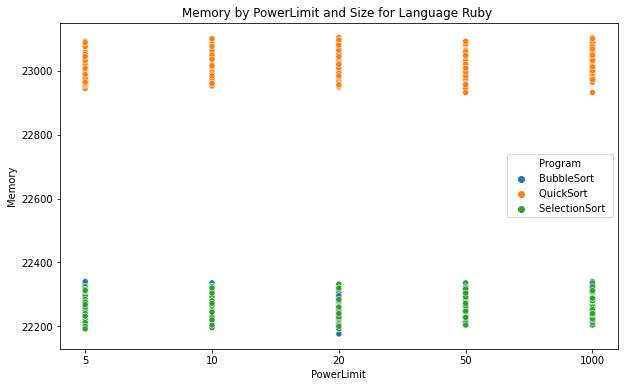

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


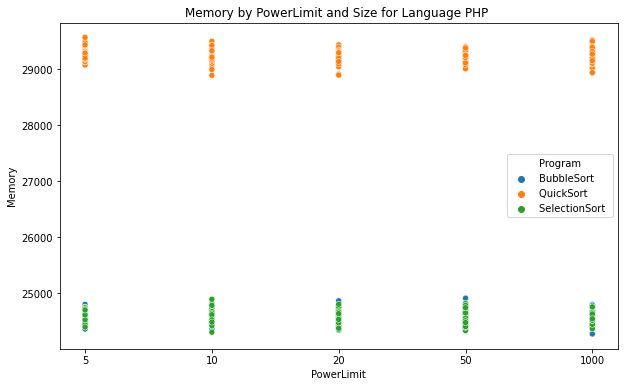

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


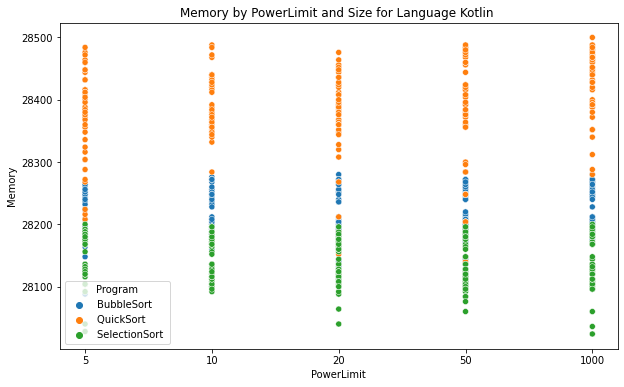

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


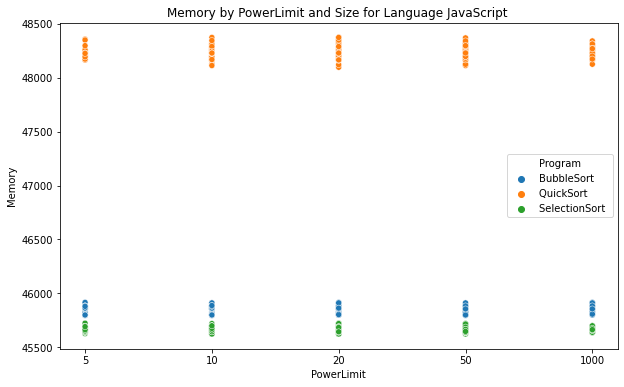

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


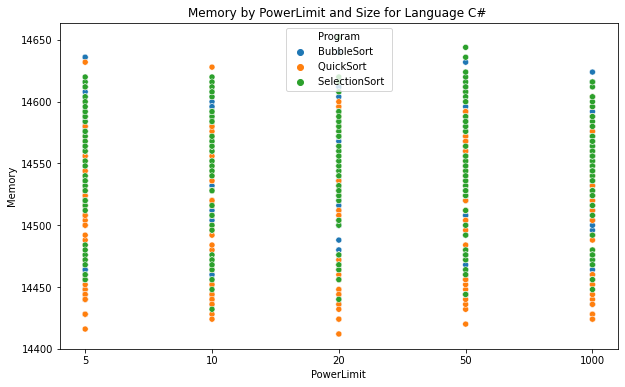

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


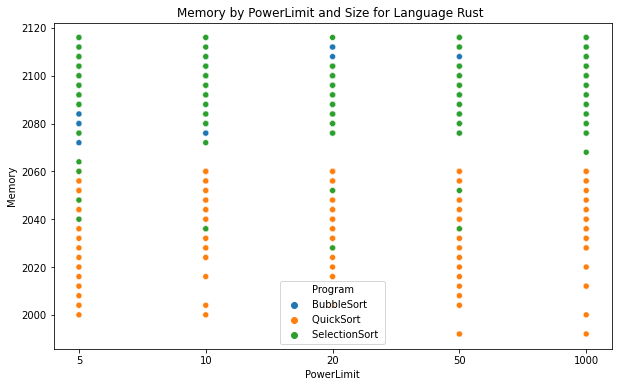

C:\Users\utilizador\AppData\Local\Temp\ipykernel_14700\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


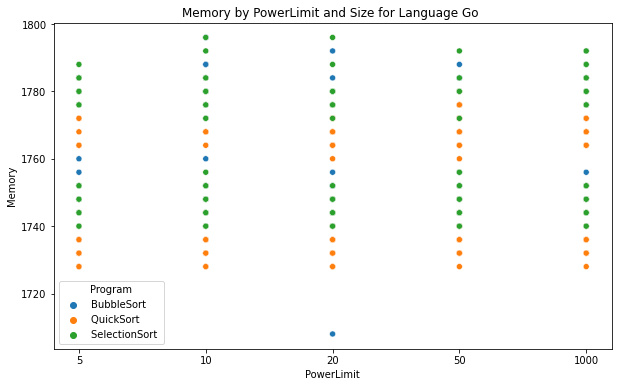

In [98]:
import matplotlib.pyplot as plt
import seaborn as sea

# Columns for comparison
columns = ["Time", "Package", "Memory"]
group_column = "PowerLimit"  # Specify the column to group by

# Iterate over the columns
for col in columns:
    languages = df['Language'].unique()
    for language in languages:
        plt.figure(figsize=(10, 6))
        
        data_subset = df[(df['Language'] == language) & (df['Size'] == 5000)]
        data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)
        
        ax = sea.scatterplot(data=data_subset, x=group_column, y=col, hue='Program')  # Add size='Size' parameter
        
        plt.xlabel(group_column)
        plt.ylabel(col)
        plt.title(f'{col} by {group_column} and Size for Language {language}')
        
        plt.legend(title='Program')
        plt.show()

Conclusões a retirar-> O quickSort demonstra ser melhor em tempo e package. Em algumas excessões o selection sort é melhor mas vamos focar-nos na analise dos resultados do quickSort

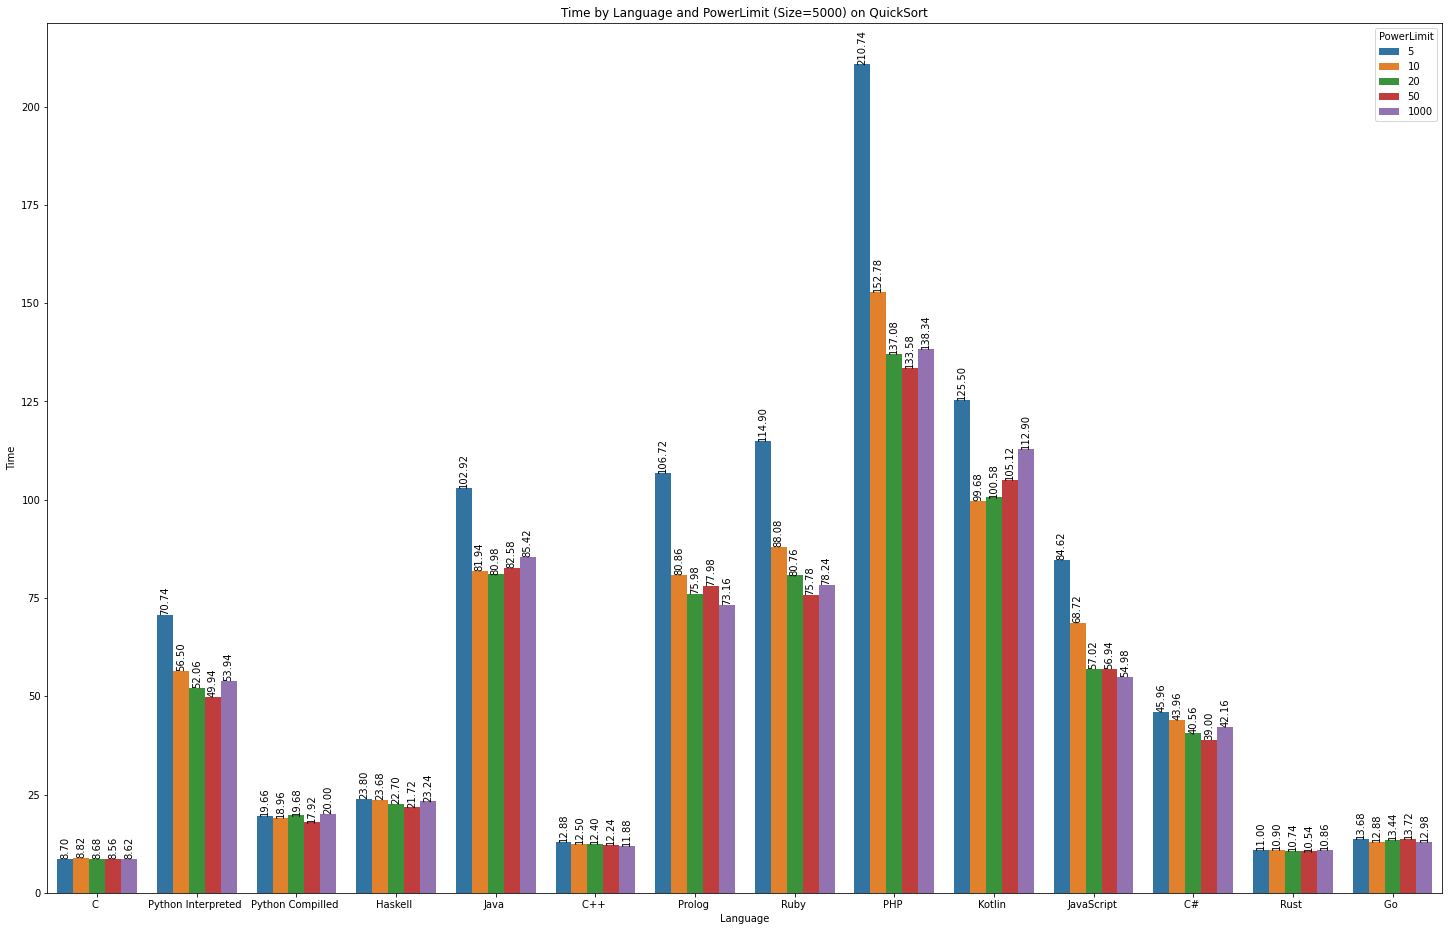

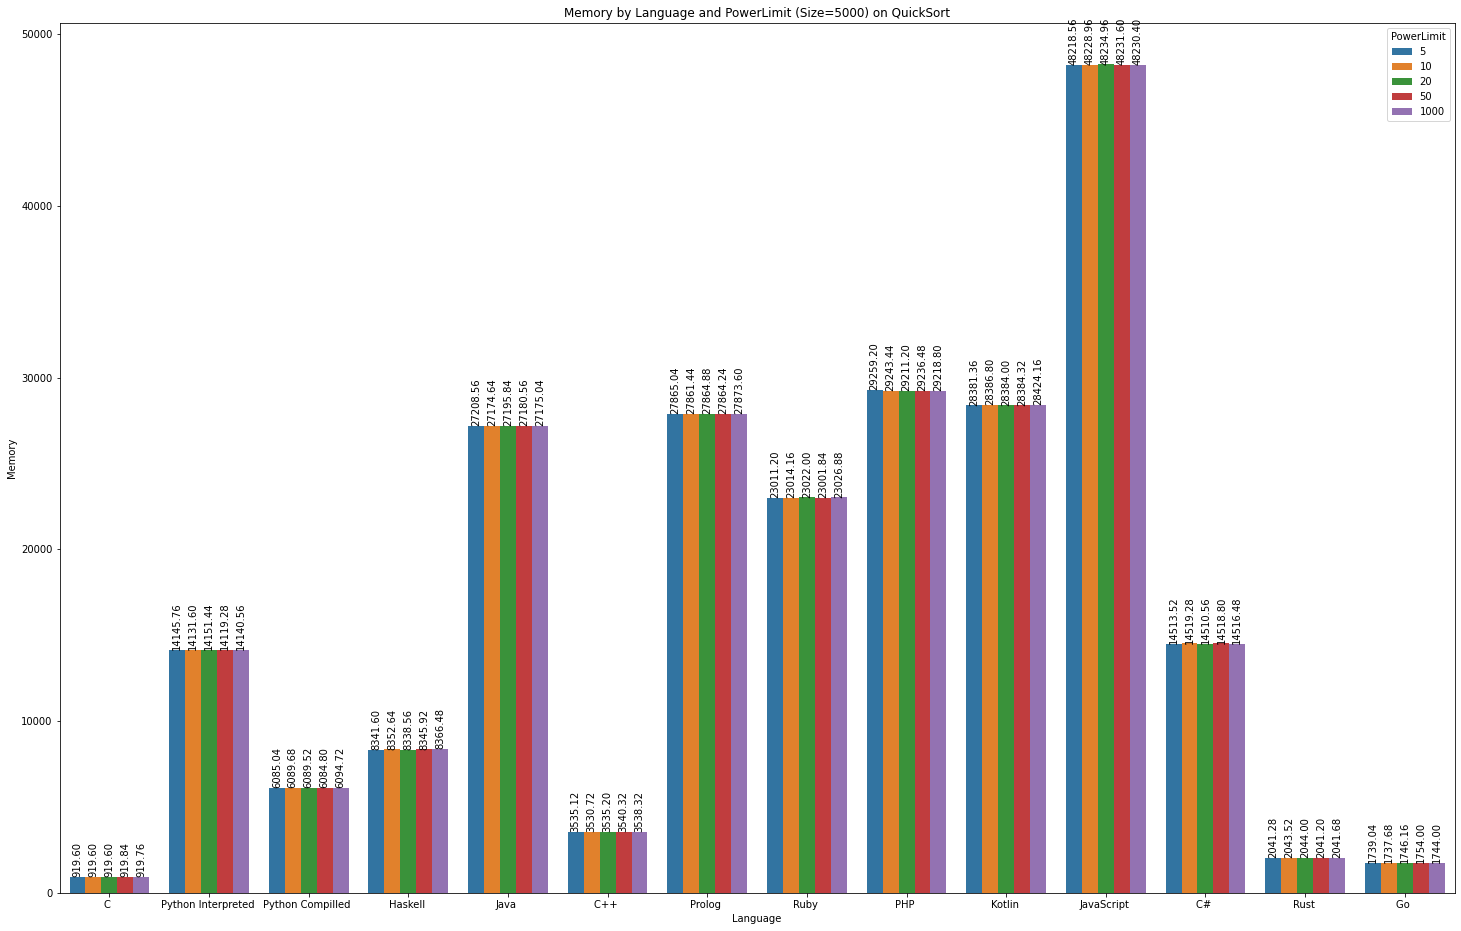

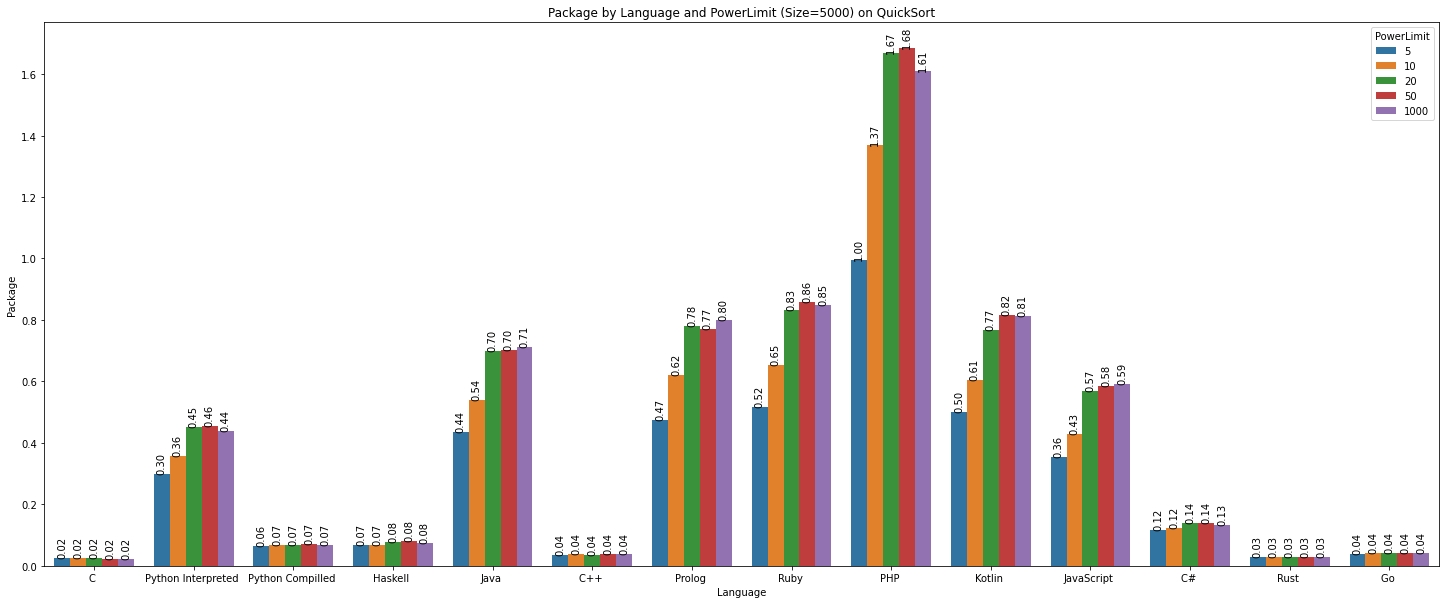

In [99]:
import matplotlib.pyplot as plt
import seaborn as sea

size = 5000

for col in ["Time", "Memory", "Package"]:
    if col in ["Time", "Memory"]:
        plt.figure(figsize=(25, 16))  # Aumenta a altura do gráfico
    else:
        plt.figure(figsize=(25, 10))  # Tamanho padrão
    
    data_subset = df[(df['Size'] == size)&(df['Program'] == 'QuickSort ')]

    hue_labels = [val for val in data_subset['PowerLimit']]
    ax = sea.barplot(data=data_subset, x='Language', y=col, hue=hue_labels, errorbar=None)
    plt.xlabel('Language')
    plt.ylabel(col)
    plt.title(f'{col} by Language and PowerLimit (Size={size}) on QuickSort')
    plt.legend(title='PowerLimit')

    # Add the measured values on top of each bar
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        
        ax.text(x + width / 2, y + height, format(height, '.2f'),
                ha='center', va='bottom', rotation='vertical')

    plt.show()


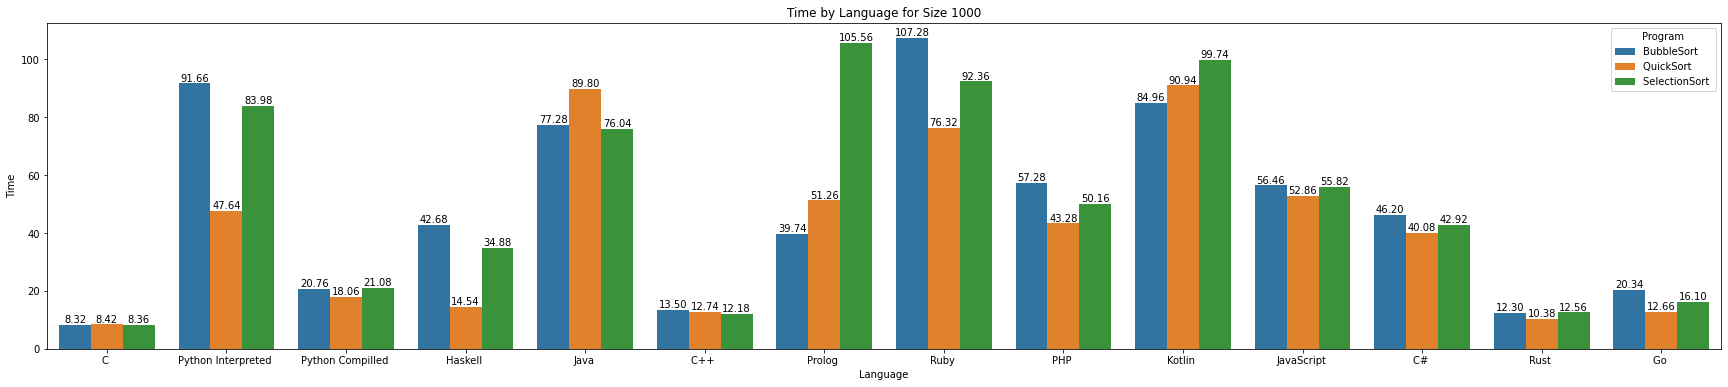

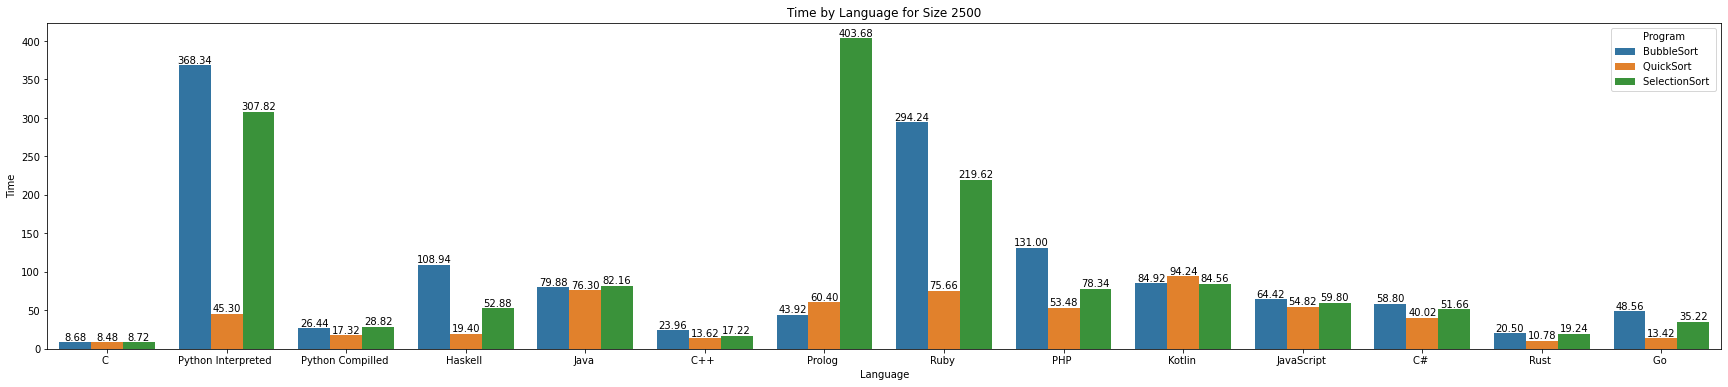

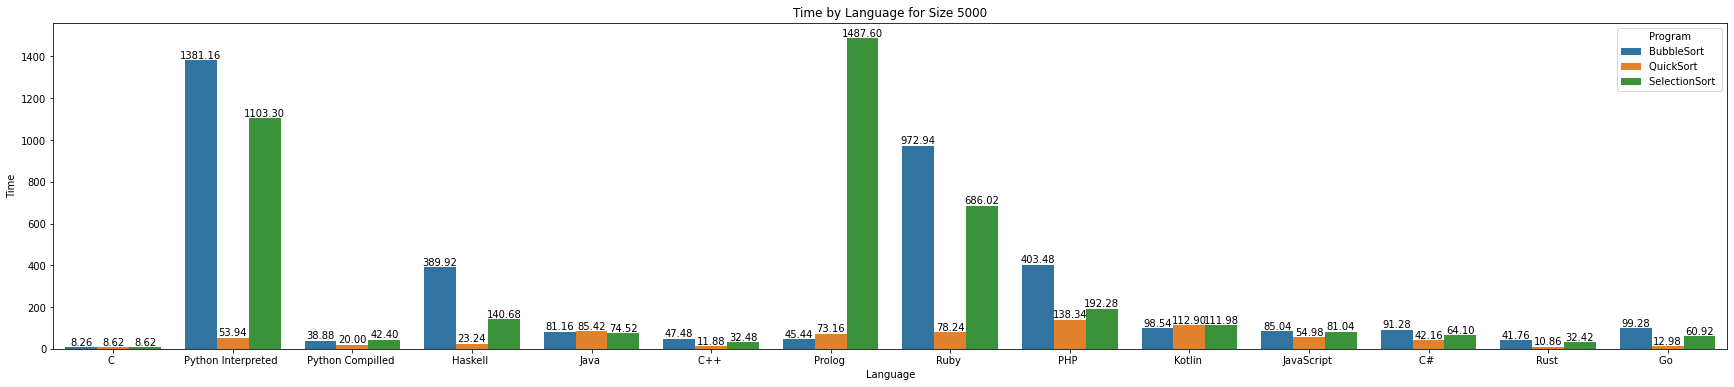

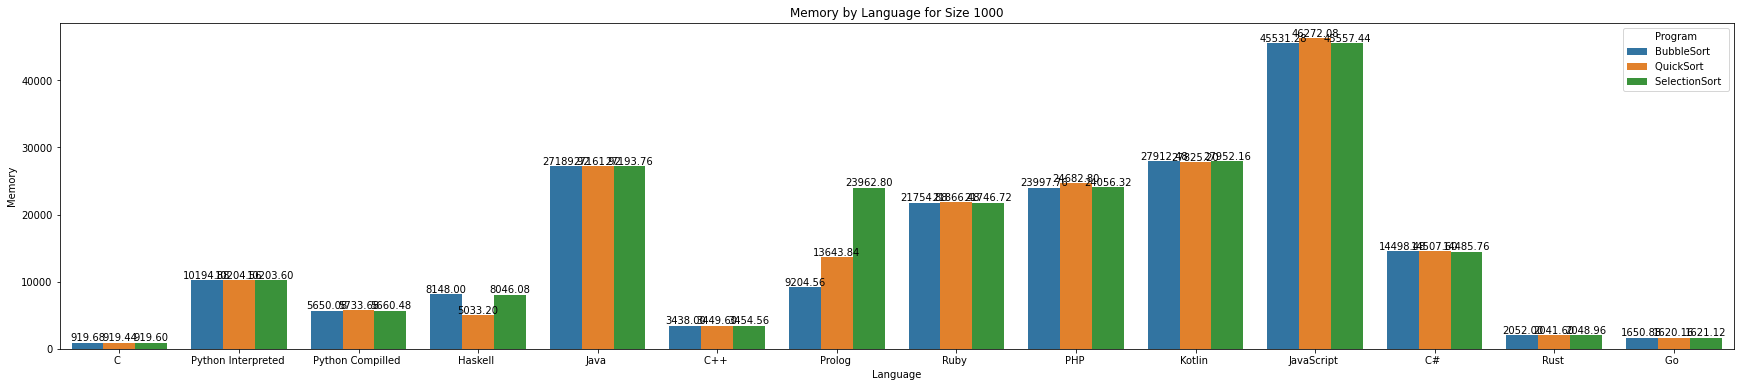

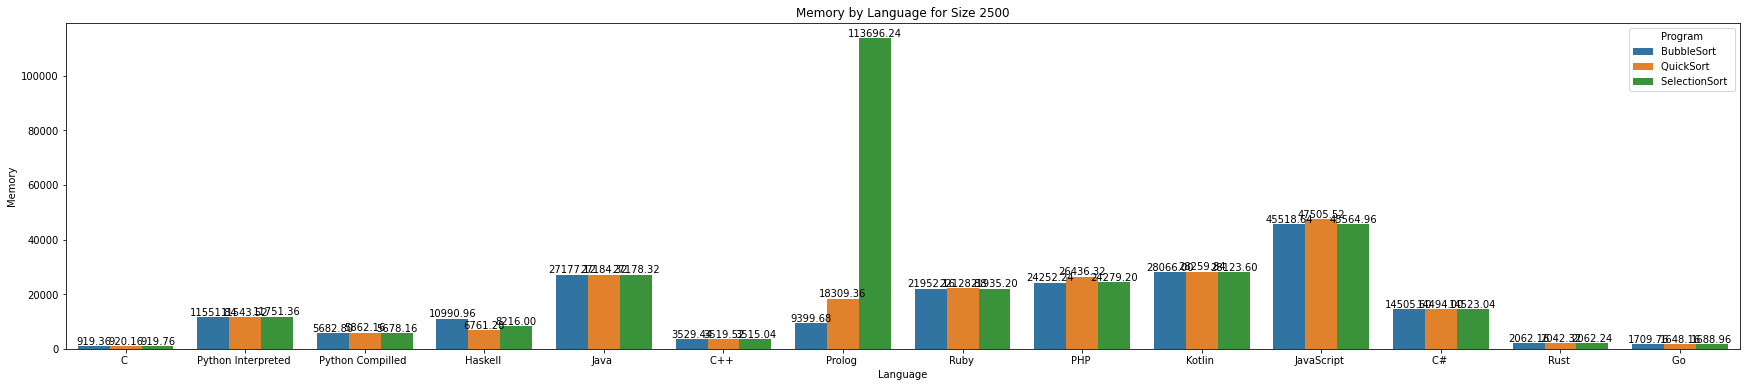

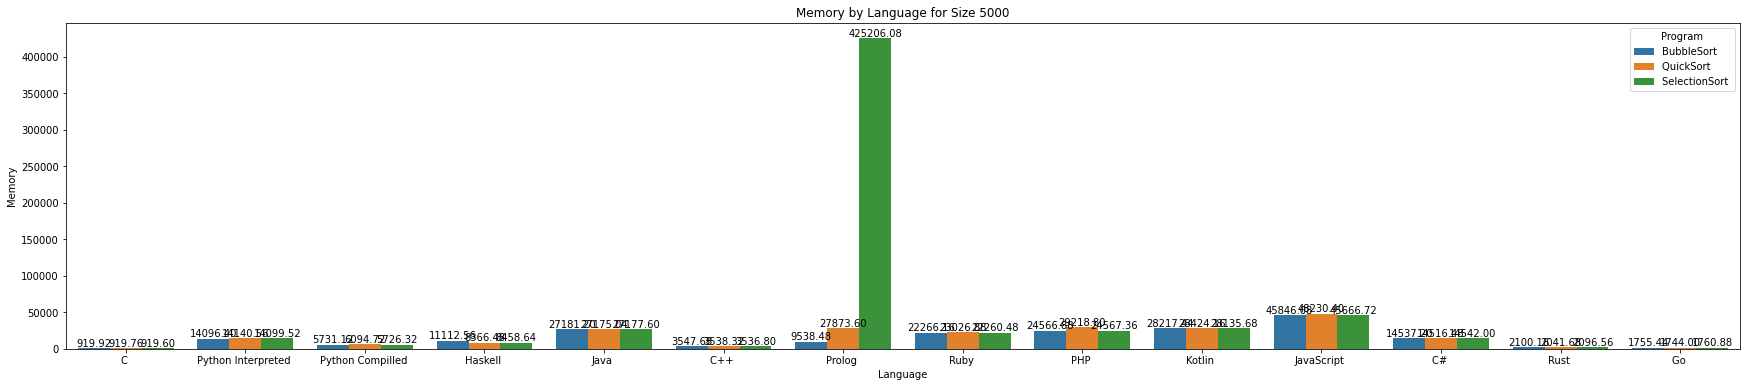

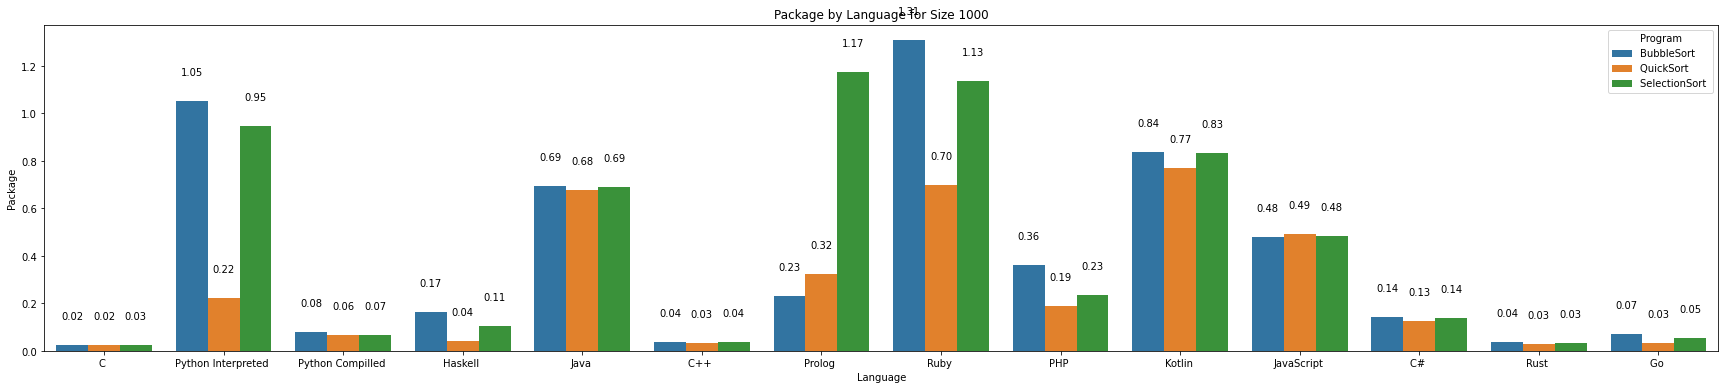

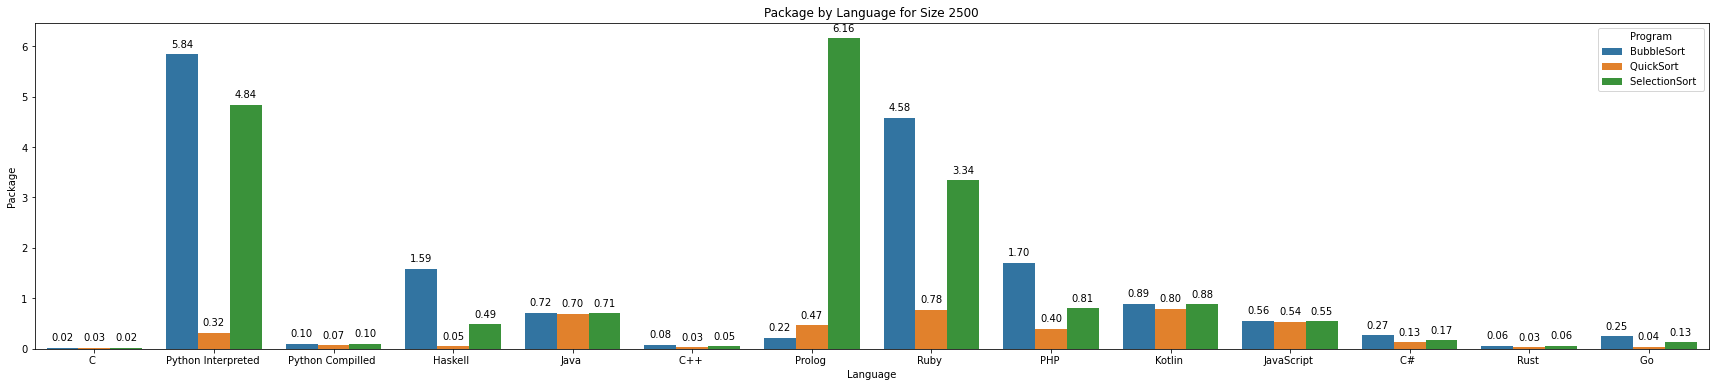

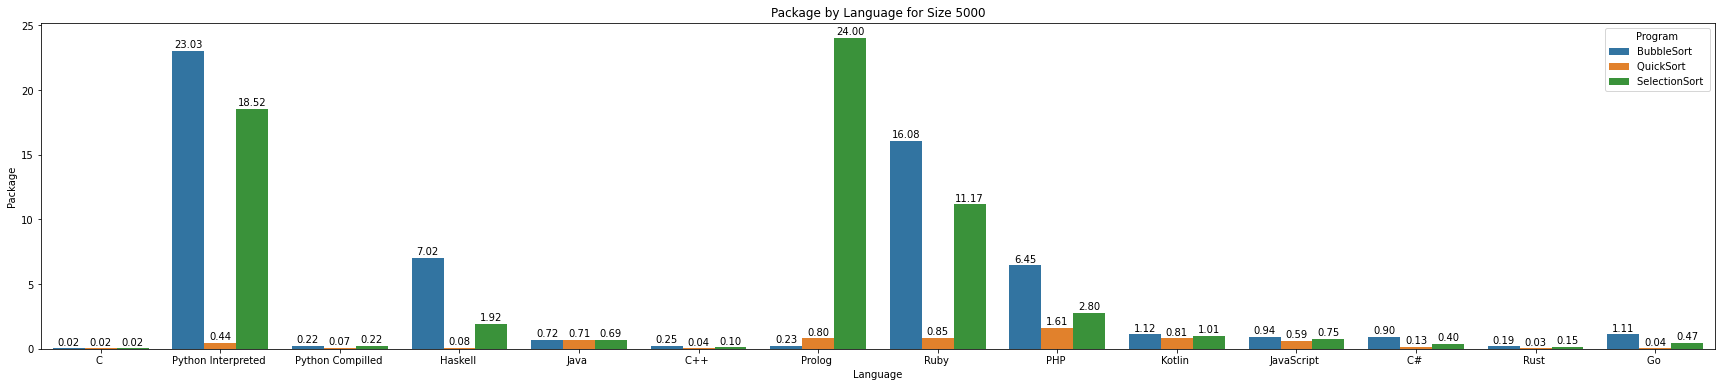

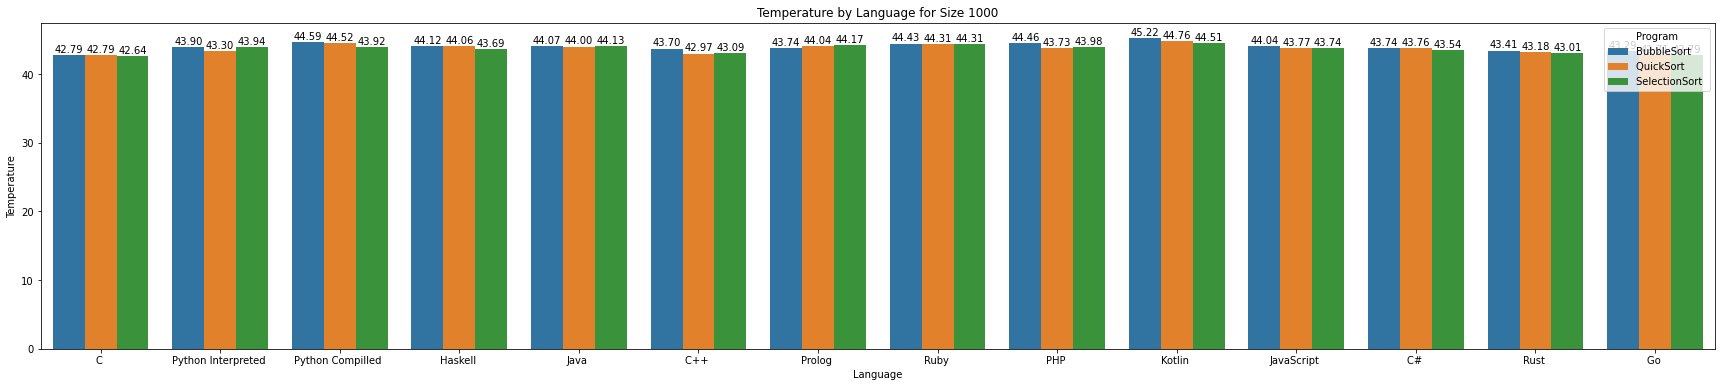

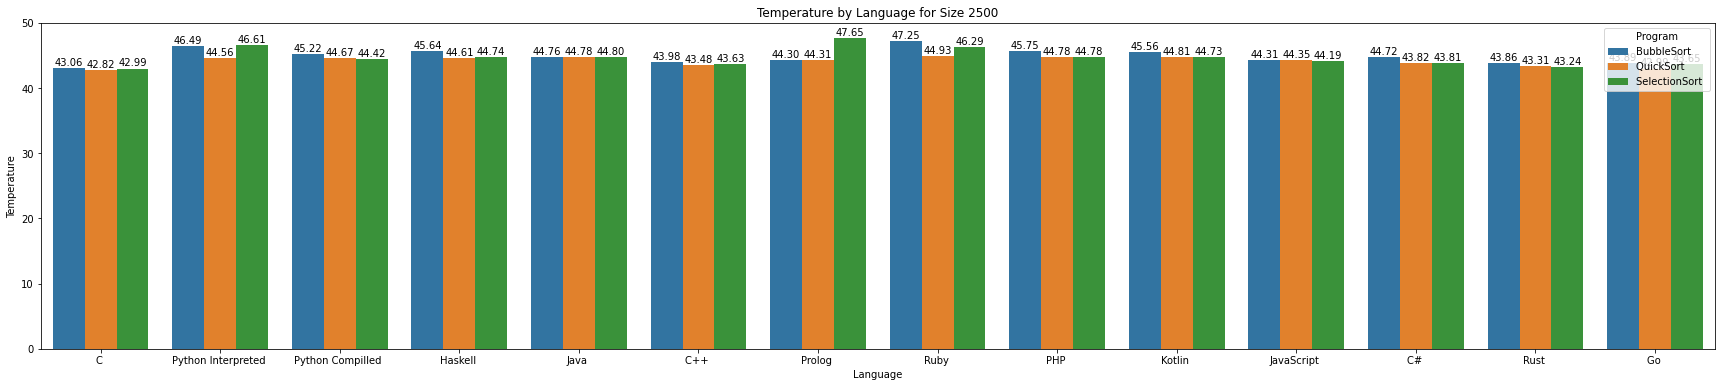

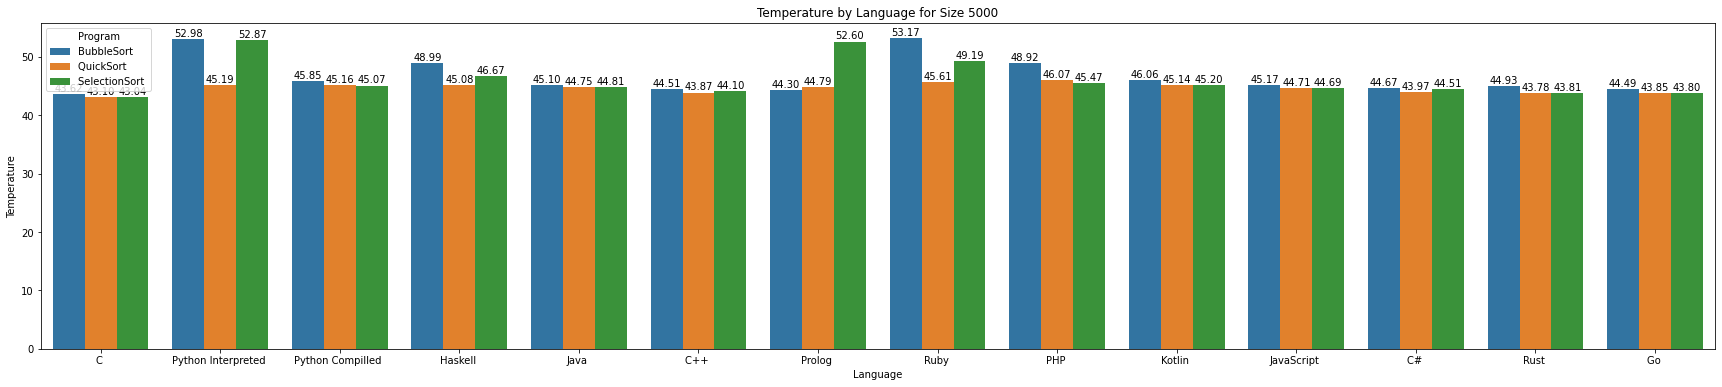

In [100]:
import matplotlib.pyplot as plt
import seaborn as sea

# Criar um gráfico de barras agrupadas na orientação vertical para cada valor único da coluna "Size"
for col in ["Time", "Memory", "Package","Temperature"]:
    for size in df['Size'].unique():
        plt.figure(figsize=(30, 6))
        subset = df[(df['Size'] == size) &(df['PowerLimit'] == 1000)]
        ax = sea.barplot(data=subset, x='Language', y=col, hue='Program', errorbar=None)
        plt.xlabel('Language')
        plt.ylabel(col)
        plt.title(f'{col} by Language for Size {size}')
        plt.legend(title='Program')
        #ax.set_xticklabels(df['Language'].unique(), rotation=90)  # Definir os rótulos do eixo x como as línguas
    
        # Adicionar os valores medidos na vertical em cima de cada barra
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 0.1, format(height, '.2f'),
                    ha='center', va='bottom', rotation='horizontal')
    
        plt.show()


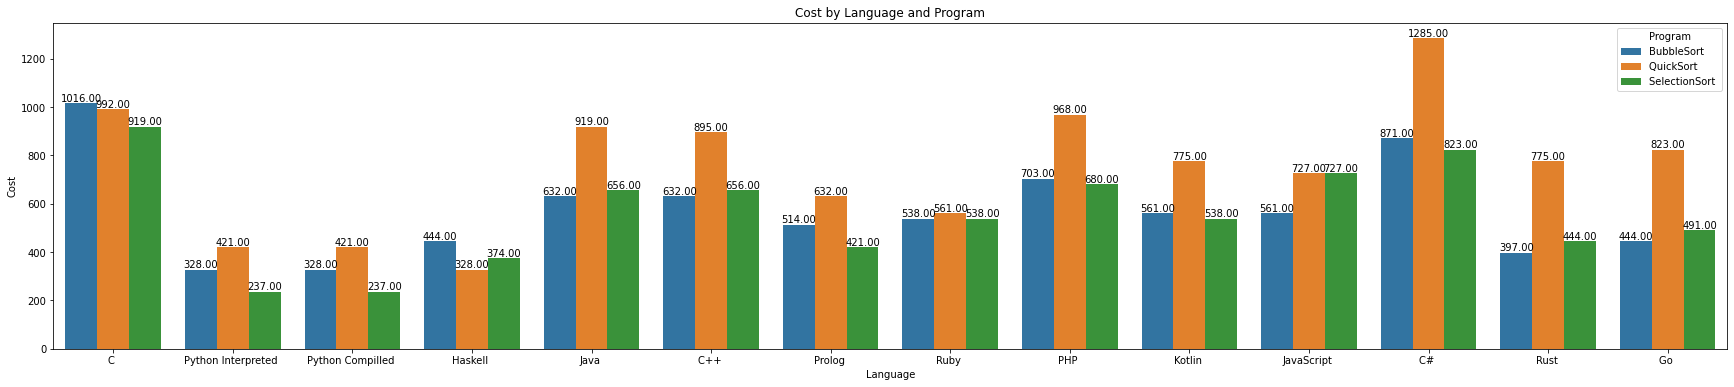

In [101]:
import matplotlib.pyplot as plt
import seaborn as sea

# Valor da coluna para comparação
col = "Cost"

plt.figure(figsize=(30, 6))
subset = df
ax = sea.barplot(data=subset, x='Language', y=col, hue='Program', errorbar=None)
plt.xlabel('Language')
plt.ylabel(col)
plt.title(f'{col} by Language and Program')
plt.legend(title='Program')
#ax.set_xticklabels(df['Language'].unique(), rotation=90)  # Definir os rótulos do eixo x como as línguas
# Adicionar os valores medidos na vertical em cima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, format(height, '.2f'),
            ha='center', va='bottom', rotation='horizontal')
plt.show()

<Axes: >

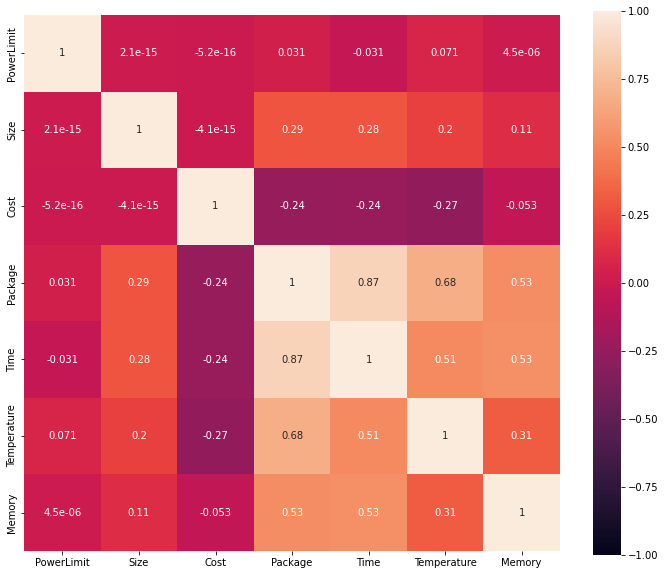

In [102]:
import seaborn as sns

new_df = df.drop(["Program", "Language"], axis=1)
corr_matrix = new_df.corr()

f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

<Axes: xlabel='Time', ylabel='Language'>

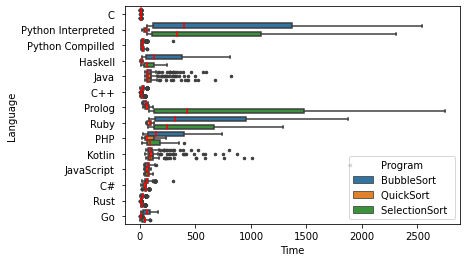

In [103]:
sea.boxplot(data=df,hue='Program',x='Time',y='Language',medianprops={"color":"red"},
            flierprops={"marker": "."},)

In [104]:
filtered_data = df[(df["PowerLimit"] == 5)]  
average_time = filtered_data.groupby("Program")["Time"].mean() 
average_time = average_time.sort_values(ascending=True) 

filtered_data2 = df[(df["PowerLimit"] == 1000)]
average_time2 = filtered_data2.groupby("Program")["Time"].mean() 
average_time2 = average_time2.sort_values(ascending=True) 

gain_loss = ((average_time - average_time2) / average_time2) * 100

gain_loss_formatted = gain_loss.map("{:.2f}%".format)

print(average_time)
print(average_time2)
print(gain_loss_formatted)


Program
QuickSort          57.306190
BubbleSort        230.314762
SelectionSort     245.069048
Name: Time, dtype: float64
Program
QuickSort          44.736667
BubbleSort        138.713810
SelectionSort     149.520000
Name: Time, dtype: float64
Program
QuickSort         28.10%
BubbleSort        66.04%
SelectionSort     63.90%
Name: Time, dtype: object


In [105]:
filtered_data = df[(df["PowerLimit"] == 5) & (df["Program"] == "QuickSort ")]  
average_time = filtered_data.groupby("Language")["Time"].mean() 
average_time = average_time.sort_values(ascending=True) 

filtered_data = df[(df["PowerLimit"] == 1000) & (df["Program"] == "QuickSort ")]  
average_time2 = filtered_data2.groupby("Language")["Time"].mean() 
average_time2 = average_time2.sort_values(ascending=True) 

gain_loss = ((average_time - average_time2) / average_time2) * 100

gain_loss_formatted = gain_loss.map("{:.2f}%".format)

print(average_time)
print(average_time2)
print(gain_loss_formatted)


Language
C                        8.786667
Rust                    10.966667
C++                     13.086667
Go                      13.366667
Haskell                 19.453333
Python Compilled        20.073333
C#                      45.020000
Python Interpreted      61.146667
JavaScript              80.633333
Prolog                  82.326667
Java                   105.546667
PHP                    108.573333
Ruby                   108.653333
Kotlin                 124.653333
Name: Time, dtype: float64
Language
C                        8.497778
Rust                    18.977778
C++                     20.562222
Python Compilled        25.973333
Go                      35.497778
C#                      53.024444
JavaScript              62.804444
Java                    80.284444
Haskell                 91.906667
Kotlin                  95.864444
PHP                    127.515556
Prolog                 256.751111
Ruby                   289.186667
Python Interpreted     387.015556
Nam